### ETL e caricamento dati

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Data science/Sephora/reviews_0-250.csv')

# Selezione delle colonne utili
dataset_10k = df[['review_text', 'is_recommended']]

# Controlla valori mancanti
print("Valori nulli prima della rimozione:")
print(dataset_10k.isnull().sum())

# Rimuovi le righe con valori nulli (corretto)
dataset_finale = dataset_10k.dropna()

# Conferma dimensioni finali del dataset
print(f"Dimensioni finali del dataset dopo la rimozione: {dataset_finale.shape}")


print("Valori nulli dopo la rimozione:")
print(dataset_finale.isnull().sum())

dataset_finale.head()

<ipython-input-14-edab6fb7373c>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/Data science/Sephora/reviews_0-250.csv')


Valori nulli prima della rimozione:
review_text          999
is_recommended    117486
dtype: int64
Dimensioni finali del dataset dopo la rimozione: (483645, 2)
Valori nulli dopo la rimozione:
review_text       0
is_recommended    0
dtype: int64


,review_text,is_recommended
0,I use this with the Nudestix “Citrus Clean Bal...,1.0
1,I bought this lip mask after reading the revie...,0.0
2,My review title says it all! I get so excited ...,1.0
3,I’ve always loved this formula for a long time...,1.0
4,"If you have dry cracked lips, this is a must h...",1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Caricamento del dataset originale
df = pd.read_csv('/content/gdrive/MyDrive/Data science/Sephora/reviews_0-250.csv')

# Selezione delle colonne utili
dataset = df[['review_text', 'is_recommended']]

# Rimuovi le righe con valori nulli
dataset = dataset.dropna()

# Suddividi le classi per `is_recommended`
class_1 = dataset[dataset['is_recommended'] == 1.0]
class_0 = dataset[dataset['is_recommended'] == 0.0]

num_samples_per_class = 5000

balanced_class_1 = class_1.sample(n=num_samples_per_class, random_state=42)
balanced_class_0 = class_0.sample(n=num_samples_per_class, random_state=42)

# Combina e mescola i dati bilanciati
balanced_dataset = pd.concat([balanced_class_1, balanced_class_0]).sample(frac=1, random_state=42)

# Dividi il dataset bilanciato in 80% training, 10% validation e 10% testing
train_df, temp_df = train_test_split(balanced_dataset, test_size=0.2, random_state=42)

train_indices = train_df.index

# Rimuovi i dati di training dal dataset originale
remaining_dataset = dataset.drop(index=train_indices)

# Campiona 1,000 elementi per il set di validazione
val_df = remaining_dataset.sample(n=1000, random_state=42)

# Rimuovi i dati di validazione dal dataset rimanente
remaining_dataset = remaining_dataset.drop(index=val_df.index)

# Campiona 1,000 elementi per il set di test
test_df = remaining_dataset.sample(n=1000, random_state=42)

print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

print(f"Training set - is_recommended = 1: {train_df['is_recommended'].value_counts().get(1.0, 0)}")
print(f"Training set - is_recommended = 0: {train_df['is_recommended'].value_counts().get(0.0, 0)}")
print(f"Validation set - is_recommended = 1: {val_df['is_recommended'].value_counts().get(1.0, 0)}")
print(f"Validation set - is_recommended = 0: {val_df['is_recommended'].value_counts().get(0.0, 0)}")
print(f"Test set - is_recommended = 1: {test_df['is_recommended'].value_counts().get(1.0, 0)}")
print(f"Test set - is_recommended = 0: {test_df['is_recommended'].value_counts().get(0.0, 0)}")

# Salva i dataset finali su file CSV
train_df.to_csv('/content/gdrive/MyDrive/Data science/Sephora/dataset/train_dataset.csv', index=False, encoding='utf-8')
val_df.to_csv('/content/gdrive/MyDrive/Data science/Sephora/dataset/val_dataset.csv', index=False, encoding='utf-8')
test_df.to_csv('/content/gdrive/MyDrive/Data science/Sephora/dataset/test_dataset.csv', index=False, encoding='utf-8')

print("I dataset sono stati salvati!")

<ipython-input-25-6f5e1b1c2a08>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/Data science/Sephora/reviews_0-250.csv')


Validation set size: 1000
Test set size: 1000
Training set - is_recommended = 1: 3987
Training set - is_recommended = 0: 4013
Validation set - is_recommended = 1: 838
Validation set - is_recommended = 0: 162
Test set - is_recommended = 1: 827
Test set - is_recommended = 0: 173
I dataset sono stati salvati!


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
sw = stopwords.words('english')

def clean_text(text, remove_stopwords=False):
    """
    Funzione per pulire il testo:
    - Rende il testo minuscolo
    - Rimuove URL, HTML, emoji e caratteri speciali
    - Opzionalmente rimuove stopwords
    """
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)

    html_pattern = re.compile(r'<.*?>')
    text = html_pattern.sub(r'', text)

    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)

    if remove_stopwords:
        text = " ".join([word for word in text.split() if word not in sw])

    text = text.strip()

    return text


# Esegui la funzione di pulizia sul dataset
train_df['cleaned_review_text'] = train_df['review_text'].apply(lambda x: clean_text(x, remove_stopwords=True))
val_df['cleaned_review_text'] = val_df['review_text'].apply(lambda x: clean_text(x, remove_stopwords=True))
test_df['cleaned_review_text'] = test_df['review_text'].apply(lambda x: clean_text(x, remove_stopwords=True))

print(train_df[['review_text', 'cleaned_review_text']].head())
print(val_df[['review_text', 'cleaned_review_text']].head())
print(test_df[['review_text', 'cleaned_review_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review_text  \
437097  Muy buena crema para los ojos. La he estado us...   
405620  I haven’t experienced the pilling that other r...   
234224  I wanted to love this so bad but it made my ch...   
465293  I received the Clinique Wrinkle Correct Seurm ...   
523194  I like the Then I Met You Cleansing black WAAA...   

                                      cleaned_review_text  
437097  muy buena crema para los ojos. la estado usand...  
405620  experienced pilling reviewers noted serum goes...  
234224  wanted love bad made chin jawline get small bu...  
465293  received clinique wrinkle correct seurm sample...  
523194  like met cleansing black waaay better. one gre...  
                                              review_text  \
59550   Great clean. Soft scent. Doesn’t burn or dry o...   
68360   Meh, nothing special. Doesn’t do anything for ...   
583458  this saved my dry skin! my skin was so dry I c...   
254131  I have dry skin and t

### Addestramento

In [11]:
import pandas as pd

train_df = pd.read_csv('/content/gdrive/MyDrive/Data science/Sephora/dataset/train_dataset.csv')
val_df = pd.read_csv('/content/gdrive/MyDrive/Data science/Sephora/dataset/val_dataset.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Data science/Sephora/dataset/test_dataset.csv')

In [12]:
from transformers import BertTokenizer
import torch

# Carica il tokenizer pre-addestrato di BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Funzione per tokenizzare il testo e convertire in tensori (in batch)
def tokenize_text_batch(texts, max_length=512):
    encoding = tokenizer.batch_encode_plus(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return encoding['input_ids'], encoding['attention_mask']

# Prepara i dati per BERT
def prepare_data(df, tokenizer, max_length=512):
    input_ids, attention_masks = tokenize_text_batch(df['review_text'].tolist(), max_length)
    return input_ids, attention_masks

# Prepara i target (rating e is_recommended)
def prepare_targets(df):
    recommended = df['is_recommended'].values
    return torch.tensor(recommended)

train_inputs, train_masks = prepare_data(train_df, tokenizer)
val_inputs, val_masks = prepare_data(val_df, tokenizer)
test_inputs, test_masks = prepare_data(test_df, tokenizer)

train_recommendations = prepare_targets(train_df)
val_recommendations = prepare_targets(val_df)
test_recommendations = prepare_targets(test_df)

In [13]:
from transformers import BertForSequenceClassification
import torch.nn as nn

class BERTClassificationModel(nn.Module):
    def __init__(self, model_name='bert-base-uncased', num_classes=2):
        super(BERTClassificationModel, self).__init__()

        self.bert = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

        # Dropout per evitare overfitting
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask):

        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)

        # Usa i logits per la classificazione binaria
        class_preds = output.logits

        return class_preds

In [ ]:
from torch.optim import AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score
import torch

# Creare i DataLoader per training e validation (solo con 'is_recommended')
train_data = TensorDataset(train_inputs, train_masks, train_recommendations)
val_data = TensorDataset(val_inputs, val_masks, val_recommendations)

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=8, shuffle=False)

# Verifica se la GPU è disponibile
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inizializza il modello (solo classificazione binaria)
model = BERTClassificationModel()
model.to(device)  # Sposta il modello sulla GPU (o CPU)

# Impostiamo l'ottimizzatore
optimizer = AdamW(model.parameters(), lr=1e-5)

# Impostiamo la loss function
classification_loss_fn = nn.CrossEntropyLoss()  # CrossEntropyLoss per classificazione multi-classe (binaria con 2 classi)
# Modifica la funzione di addestramento
def train_model(model, train_dataloader, val_dataloader, optimizer, epochs=3):
    model.train()

    best_val_loss = float('inf')  # Inizializza la miglior perdita di validazione come infinita
    for epoch in range(epochs):
        total_train_loss = 0

        for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
            optimizer.zero_grad()

            input_ids, attention_mask, recommendations = batch

            # Sposta i tensori sulla GPU (se disponibile)
            input_ids, attention_mask, recommendations = input_ids.to(device), attention_mask.to(device), recommendations.to(device)

            # Assicurati che i target siano di tipo long (interi) per CrossEntropyLoss
            recommendations = recommendations.to(torch.long)  # CrossEntropyLoss richiede target come long tensor

            # Passa attraverso il modello
            class_preds = model(input_ids, attention_mask)

            # Calcola la perdita per la classificazione binaria
            class_loss = classification_loss_fn(class_preds.view(-1, 2), recommendations)

            # Perdita totale
            total_loss = class_loss
            total_loss.backward()

            optimizer.step()
            total_train_loss += total_loss.item()

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {total_train_loss / len(train_dataloader)}")

        # Fase di validazione
        val_loss, val_accuracy, val_f1 = evaluate_model(model, val_dataloader)

        print(f"Epoch {epoch+1}/{epochs} - Validation Loss: {val_loss}")
        print(f"Epoch {epoch+1}/{epochs} - Validation Accuracy: {val_accuracy}")
        print(f"Epoch {epoch+1}/{epochs} - Validation F1: {val_f1}")

        # Se la perdita di validazione è la più bassa, salva il modello
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')  # Salva il modello con la miglior perdita di validazione
            print("Model saved!")

# Funzione per la fase di valutazione
def evaluate_model(model, val_dataloader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disabilita il calcolo del gradiente durante la valutazione
        for batch in tqdm(val_dataloader, desc="Validation"):
            input_ids, attention_mask, recommendations = batch

            input_ids, attention_mask, recommendations = input_ids.to(device), attention_mask.to(device), recommendations.to(device)
            recommendations = recommendations.to(torch.long)

            # Passa attraverso il modello
            class_preds = model(input_ids, attention_mask)

            # Calcola la perdita
            class_loss = classification_loss_fn(class_preds.view(-1, 2), recommendations)
            total_loss += class_loss.item()

            # Salva le predizioni e le etichette per calcolare accuracy e F1-score
            _, preds = torch.max(class_preds, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(recommendations.cpu().numpy())

    # Calcola l'accuracy e la F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    return total_loss / len(val_dataloader), accuracy, f1

# Esegui l'addestramento
train_model(model, train_dataloader, val_dataloader, optimizer, epochs=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3 - Training: 100%|██████████| 1000/1000 [12:25<00:00,  1.34it/s]


Epoch 1/3 - Train Loss: 0.27512861247733233


Validation: 100%|██████████| 125/125 [00:27<00:00,  4.50it/s]


Epoch 1/3 - Validation Loss: 0.16875295297056436
Epoch 1/3 - Validation Accuracy: 0.938
Epoch 1/3 - Validation F1: 0.9620098039215687
Model saved!


Epoch 2/3 - Training: 100%|██████████| 1000/1000 [12:08<00:00,  1.37it/s]


Epoch 2/3 - Train Loss: 0.10971858622482977


Validation: 100%|██████████| 125/125 [00:27<00:00,  4.50it/s]


Epoch 2/3 - Validation Loss: 0.1706325111463666
Epoch 2/3 - Validation Accuracy: 0.938
Epoch 2/3 - Validation F1: 0.9621951219512195


Epoch 3/3 - Training: 100%|██████████| 1000/1000 [12:08<00:00,  1.37it/s]


Epoch 3/3 - Train Loss: 0.04935084867989645


Validation: 100%|██████████| 125/125 [00:27<00:00,  4.50it/s]

Epoch 3/3 - Validation Loss: 0.16975996348727496
Epoch 3/3 - Validation Accuracy: 0.937
Epoch 3/3 - Validation F1: 0.9614206981016534


#### Salvataggio primo modello

In [ ]:
import torch

# Salvataggio del modello
torch.save(model, '/content/gdrive/MyDrive/Data science/Sephora/modello/BERT_v1_full.pth')

##### Caricamento modello e validazione

In [14]:
from transformers import BertForSequenceClassification
import torch

# Inizializza il modello
model = BERTClassificationModel()

# Carica i pesi salvati
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Data science/Sephora/modello/best_model.pth'))

# Metti il modello su GPU (se disponibile)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-14-8e924eb89b3b>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We reco

BERTClassificationModel(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_f

Test Loss: 0.19850756350668178
Test Accuracy for is_recommended: 0.925

Classification Report:
                 precision    recall  f1-score   support

Not Recommended     0.7094    0.9595    0.8157       173
    Recommended     0.9909    0.9178    0.9529       827

       accuracy                         0.9250      1000
      macro avg     0.8501    0.9387    0.8843      1000
   weighted avg     0.9422    0.9250    0.9292      1000



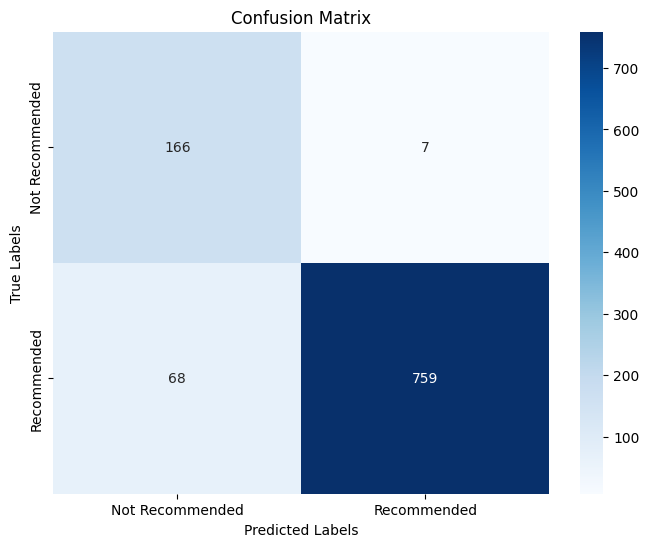

Confusion Matrix:
[[166   7]
 [ 68 759]]
Precision: 0.9909
Recall: 0.9178
F1-Score: 0.9529


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

# Definisci la funzione di perdita per la classificazione
classification_loss_fn = nn.CrossEntropyLoss()

# Creare il DataLoader per il test set (solo con 'is_recommended')
test_data = TensorDataset(test_inputs, test_masks, test_recommendations)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=False)

def evaluate_model(model, test_dataloader):
    model.eval()  # Setta il modello in modalità valutazione
    total_test_loss = 0
    correct_classifications = 0
    total_classifications = 0

    all_recommendations = []
    all_class_preds = []

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, recommendations = batch

            # Trasferisci i tensori su GPU (se disponibile)
            input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
            recommendations = recommendations.to(device).to(torch.long)

            # Passa attraverso il modello
            class_preds = model(input_ids, attention_mask)

            # Calcola la perdita per la classificazione
            class_loss = classification_loss_fn(class_preds.view(-1, 2), recommendations)
            total_test_loss += class_loss.item()

            # Calcola accuratezza per classificazione
            preds_class = torch.argmax(class_preds, dim=1)
            correct_classifications += (preds_class == recommendations).sum().item()
            total_classifications += len(recommendations)

            # Salva i risultati per le metriche
            all_recommendations.extend(recommendations.cpu().numpy())
            all_class_preds.extend(preds_class.cpu().numpy())

    # Calcola metrica per classificazione
    accuracy = correct_classifications / total_classifications
    print(f"Test Loss: {total_test_loss / len(test_dataloader)}")
    print(f"Test Accuracy for is_recommended: {accuracy}")

    # Report per classificazione
    print("\nClassification Report:")
    report = classification_report(
        all_recommendations, all_class_preds, target_names=["Not Recommended", "Recommended"], digits=4
    )
    print(report)

    conf_matrix = confusion_matrix(all_recommendations, all_class_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Metriche principali
    print(f"Confusion Matrix:\n{conf_matrix}")
    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]) if (conf_matrix[1, 1] + conf_matrix[0, 1]) > 0 else 0
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if (conf_matrix[1, 1] + conf_matrix[1, 0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

evaluate_model(model, test_dataloader)